In [70]:
## Notebook per il training ##

# Importazione delle librerie necessarie

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO

# Importazione degli url attraverso la libreria Request

red_wine_url= 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv'
white_wine_url = 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-white.csv'

# Definizione delle GET attraverso la Requests per avere i dati
response_red = requests.get(red_wine_url)
response_white = requests.get(white_wine_url)

# Check per vedere se le GET hanno dato esito favorevole o meno, restituendomi i dati richiesti
if response_red.status_code == 200 and response_white.status_code == 200:
    df_red_wine = pd.read_csv(StringIO(response_red.text), sep=';')
    df_white_wine = pd.read_csv(StringIO(response_white.text), sep=';')

    display(df_red_wine)
    display(df_white_wine)
# Restituisce gli status code per ciascun URL se le richieste non hanno ritrovato i dati    
else:
    print('Errore. Status code (Primo URL):', response_red.status_code)
    print('Errore. Status code (Secondo URL):', response_white.status_code)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [71]:
# Prima di iniziare a lavorare sui dati, è mia prassi fare un backup dei df originali
# Copia di backup dei df originali

df_r_wine = df_red_wine.copy()
df_w_wine = df_white_wine.copy()

In [72]:
# Considerazioni preliminari:
# i due df hanno una ingente disparità di record, rendendo così difficoltosa un'analisi approfondita basata sulla tipologia (vino rosso e bianco)
# si tratta di tipologie diverse dello stesso vino "Vinho Verde" (fonte: punto 4, https://github.com/FabioGagliardiIts/datasets/blob/main/wine_quality/winequality.names)
# lo scopo è quello di predirre la qualità del vino (a prescindere, quindi, dal fatto che si tratti di una variante di rosso o di bianco)
# Fatte queste premesse, mi è sembrato opportuno unire i due df in un unico dataset per avere una migliore visione d'insieme e per porre in essere una predizione più concreta
df_r_wine['type'] = 0
df_w_wine['type'] = 1

display(df_r_wine)
display(df_w_wine)

frames = [df_r_wine, df_w_wine]
df_wine = pd.concat(frames)
display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


<h1> Legenda delle colonne </h1>

1 Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids. <br>
2 Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste. <br>
3 Citric acid. A weak organic acid used to increase the freshness and flavor of wine.<br>
4 Residual sugar. The amount of sugar left after fermentation. <br>
5 Chlorides. The amount of salt in wine. The lower chloride rate creates better quality wines. <br>
6 Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage. <br>
7 Total sulfur dioxide. The amount of free and bound forms of SO2.<br>
8 Density. Depends on the alcohol and sugar content. Better wines usually have lower densities. <br>
9 pH. Used to check the level of acidity or alkalinity of wine. <br>
10 Sulfates. An antibacterial and antioxidant agent added to wine. <br>
11 Alcohol. The percentage of alcohol in wine. A higher concentration leads to better quality.<br>
12 Type. 0 Red wine, 1 White wine.

<h1> Analisi EDA </h1>
- Controllo per eventuali valori nulli <br>
- Controllo degli outliers <br>
- Gestione degli outliers <br>
- Data visualization per capire l'andamento dei dati <br>
- Matrice di correlazione per inidividuare quali potrebbero essere le features da mantenere per il traning del modello <br>


In [73]:
# Check per vedere se ci sono valori nulli
# Utilizzo una funzione che mostra quanti valori nulli ci sono - o potrebbero esserci- all'interno del df

def display_null_counts(df):
    null_counts = df.isna().sum()
    display(null_counts)
    print('\n')

display_null_counts(df_wine)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [74]:
# Utilizzo il metodo .describe() per iniziare ad analizzare il contenuto del df

df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<h1> Outliers </h1>
<h3> Da una preliminare analisi dei dati, è possibile notare come ci sia/siano record nella colonna 'quality' (colonna target) con valori molto alti e molto bassi. Ho quindi optato per capire quali e quanti siano quei record </h3>

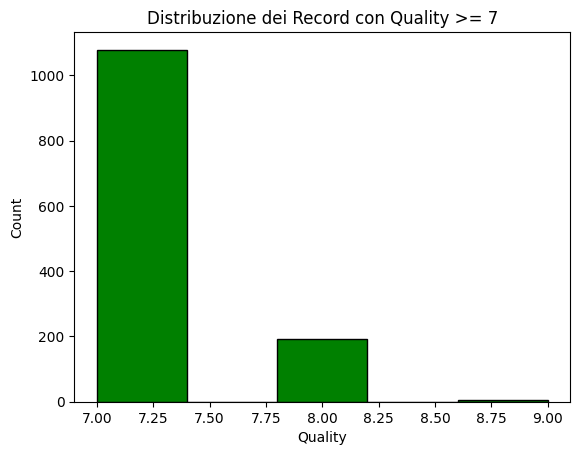

Numero di record con quality = 7: 1079
Numero di record con quality = 8: 193
Numero di record con quality = 9: 5


In [75]:
# Definisco un treshold nella colonna quality oltre il quale i record sono classificati come outliers
# Ho optato per definire i record oltre il valore 7 come outliers
outliers = df_wine[df_wine['quality'] >= 7]

# Grafico per capirne la distribuzione
plt.hist(outliers['quality'], bins=5, edgecolor='black', color='green')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribuzione dei Record con Quality >= 7')
plt.show()

# Separo gli outliers: voglio sapere quanti record ci sono per ogni valore >= 7
# Numero dei record con valore 7
count_quality_7 = (df_wine['quality'] == 7).sum()
records_quality_7 = df_wine[df_wine['quality'] == 7]

# Numero record con valore 8
count_quality_8 = (df_wine['quality'] == 8).sum()
records_quality_8 = df_wine[df_wine['quality'] == 8]

# Numero record con valore 9
count_quality_9 = (df_wine['quality'] == 9).sum()
records_quality_9 = df_wine[df_wine['quality'] == 9]

print(f"Numero di record con quality = 7: {count_quality_7}")
print(f"Numero di record con quality = 8: {count_quality_8}")
print(f"Numero di record con quality = 9: {count_quality_9}")

In [76]:
# preliminare dataviz della distribuzione dei dati 

# N.B. 
# ho commentato la successiva linea di codice solo per risparmiare tempo e potere computazionale

#sns.pairplot(df_wine)

<Axes: >

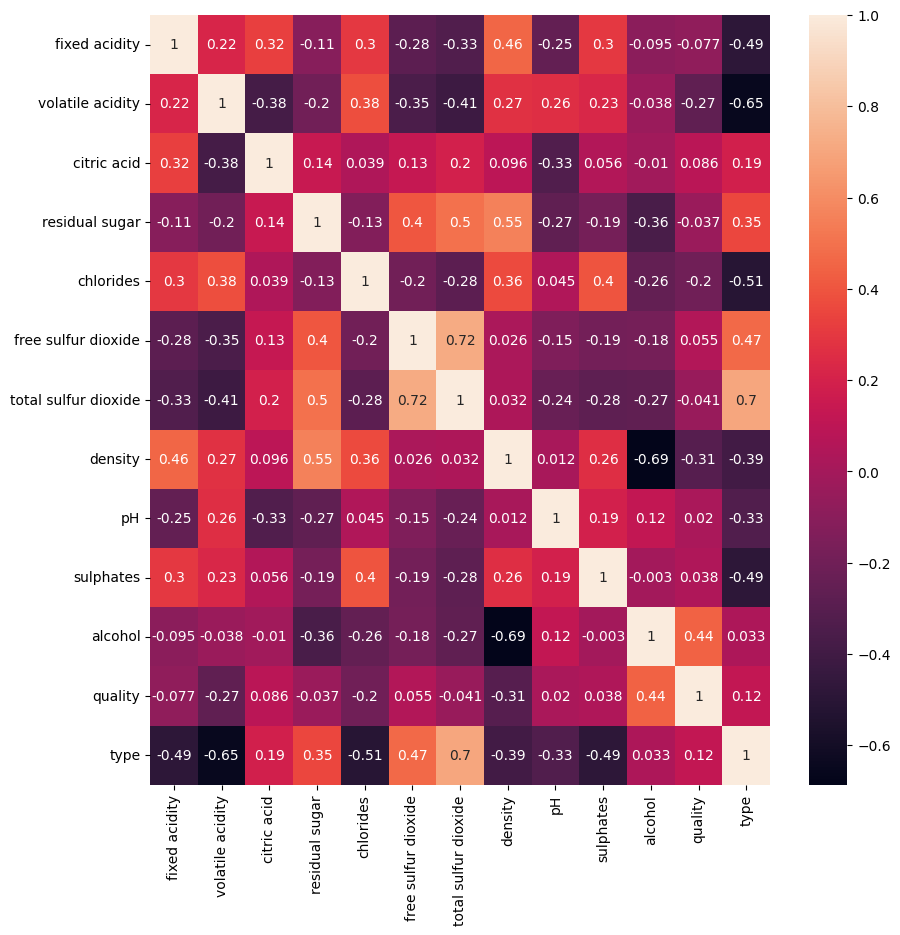

In [77]:
# Matrice di correlazione per avere una rappresentazione grafica di quale sia (o siano) la feature con una correlazione più forte con la colonna target (quality)
# ho utilizzato una variabile 'ax' per aumentare le dimensioni della matrice di correlazione

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_wine.corr(), annot=True, ax = ax)

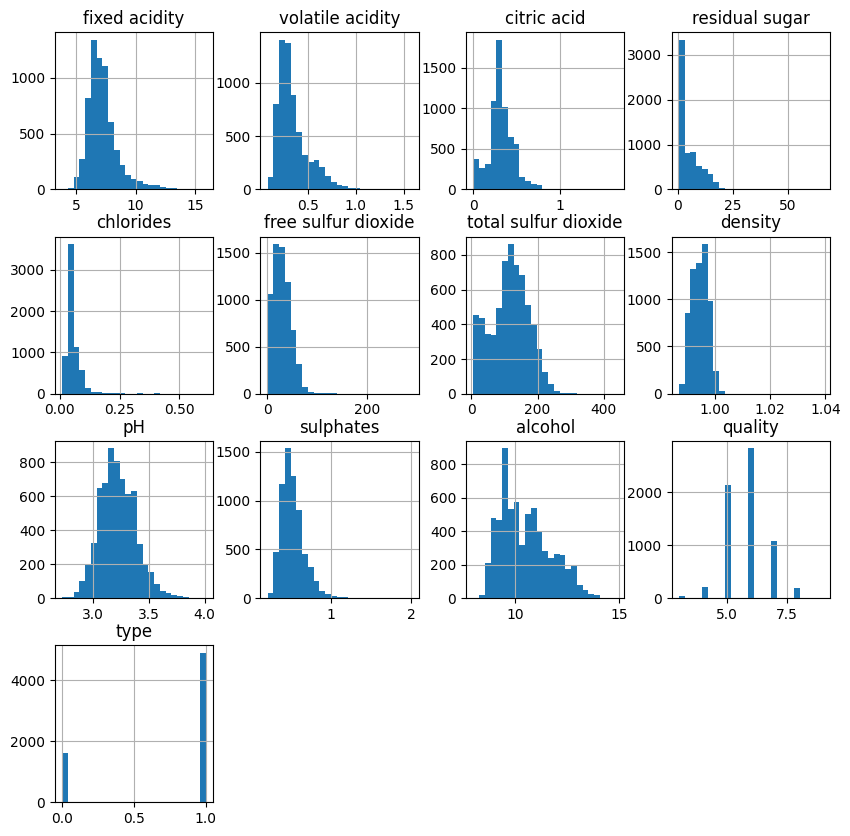

In [78]:
# dataviz a istogrammi per vedere la distribuzione dei dati del df
df_wine.hist(bins=25, figsize = (10,10))
plt.show()

Text(0, 0.5, 'alcohol')

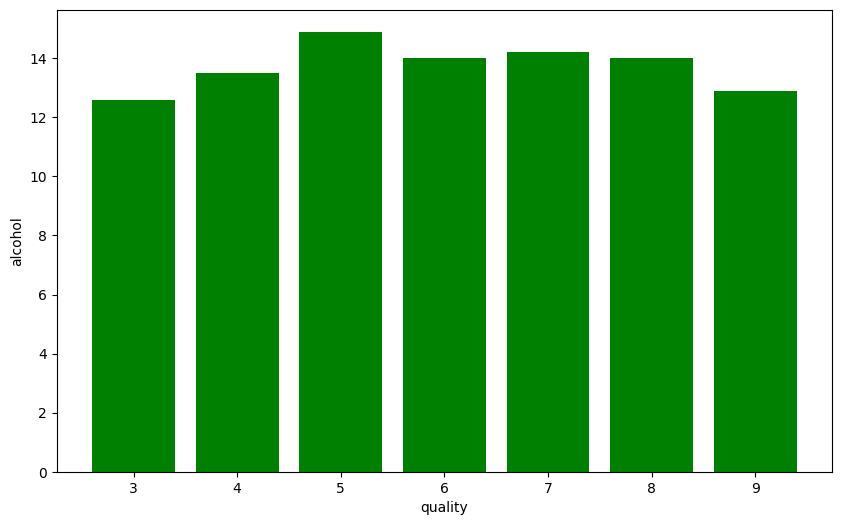

In [79]:
# Definita la matrice di correlazione, prendo in considerazione la colonna target (quality) con la feature con maggiore correlazione (alcohol)
# dataviz per mostrare a schermo il grafico che prende in considerazione la colonna target con la main feature del df
plt.figure(figsize = (10,6))
plt.bar(df_wine['quality'], df_wine['alcohol'], color = 'green')
plt.xlabel('quality')
plt.ylabel('alcohol')

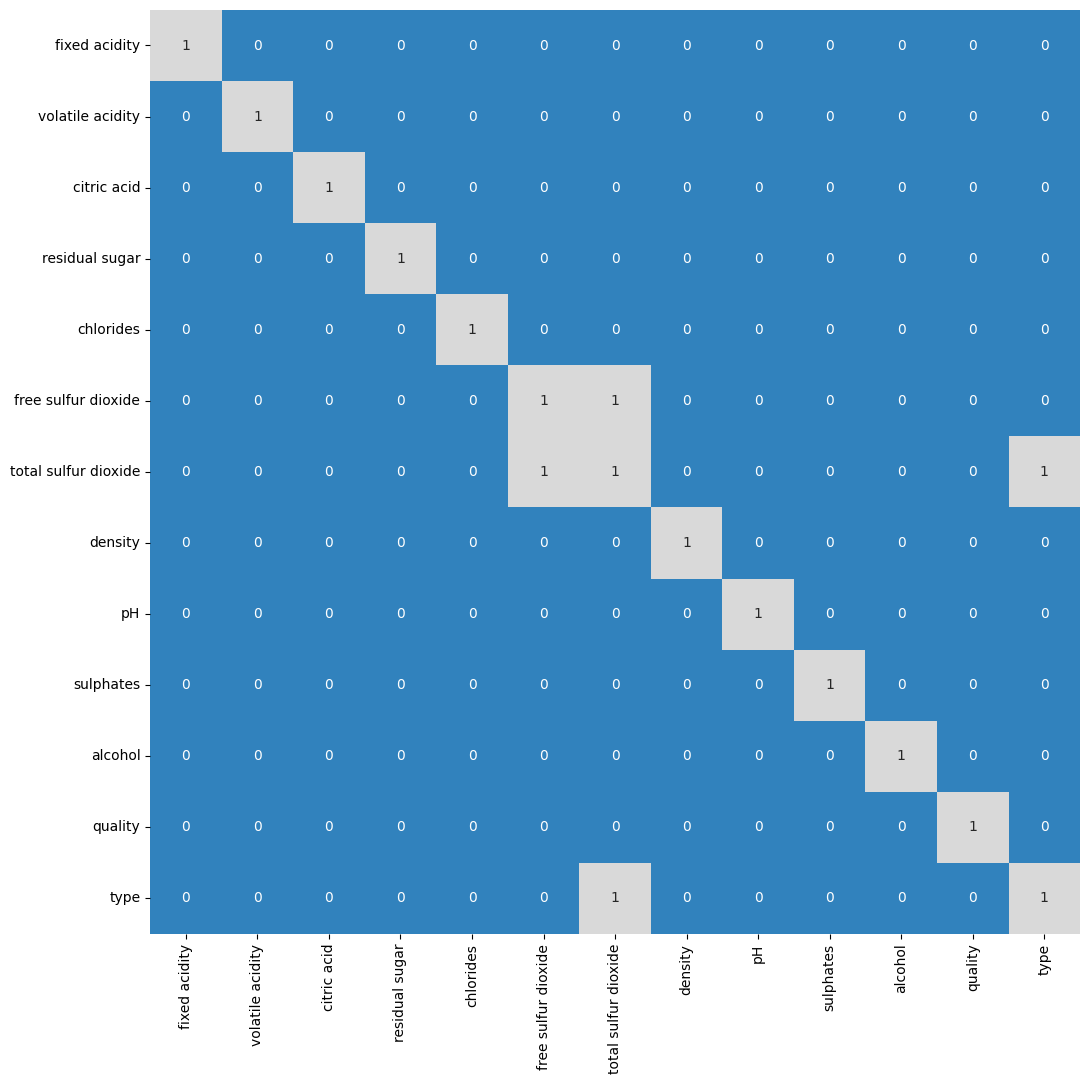

In [80]:
# determino con un valore arbitrario (in questo caso 0,7) quale sia/siano le altre features che hanno una correlazione forte 
plt.figure(figsize=(12, 12))
sns.heatmap(df_wine.corr() > 0.7, annot=True, cbar=False, cmap='tab20c')
plt.show()

In [81]:
# Constatato il fatto che ci sono features che hanno una forte correlazione tra loro opto per:
# rimuovere la colonna 'total sulfur dioxide' dal df
df_wine = df_wine.drop('total sulfur dioxide', axis = 1)

display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1


<h1> Considerazioni sulla selezione delle features per il modello: </h1>
- l'obiettivo è quello di predirre se un vino è di buona o di scarsa qualità, ergo sarebbe opportuno semplificare la classificazione creando una nuova colonna 'best quality'<br>
- l'idea è quella di settare un treshold sulla colonna quality per distinguere se un vino è di ottima o di scarsa qualità <br>
- la colonna 'best quality' conterrebbe valori 0 o 1 in base a quanto detto nel punto sopra <br>
- nell'analisi EDA è emersa una considerevole disparità tra la qualità media dei vini rispetto a quelli di alta o bassa qualità; in questo caso creare una colonna 'best quality' bilancerebbe la distribuzione dei dati per porre in essere una modellazione più accurata <br>
- gestione degli outliers: creando la colonna 'best quality' si eviterebbe di eliminare o riqualificare gli outliers, mantenendo così i valori originali <br>

In [82]:
# Creazione di una nuova colonna ('best quality') che iterando sulla colonna quality assegna il valore 1 (se la qualità del vino è > 5) o il valore 0 (se inferiore di 5)
df_wine['best quality'] = [1 if x > 5.8 else 0 for x in df_wine.quality]
display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1,1


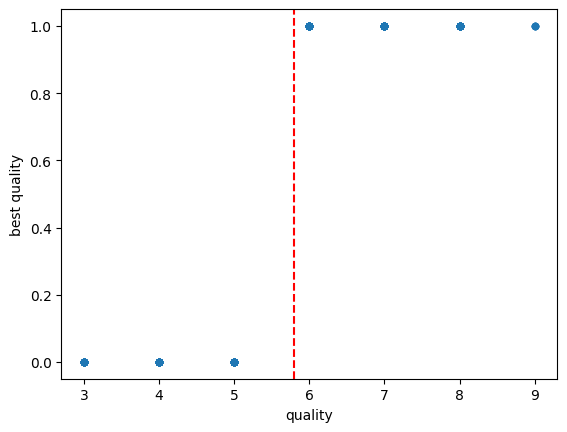

In [83]:
# Dataviz per la distribuzione dei dati tra la colonna target e quella delle features
# Aggiunta un treshold per visualizzare i valori 'quality' dai valori 'best quality'
# la treshold è settata a 5.8 che è la media dei valori
df_wine.plot.scatter(x="quality", y="best quality")
plt.axvline(x=5.8, color='r', linestyle='--', label='Threshold: 5.8')
plt.show()

<h1> Implementazione del modello </h1>

**Considerata la distribuzione dei dati e l'obiettivo finale, ritengo opportuno utilizzare la Logistic Regression per la classificazione dei vini**
<h6> Colonna target: best quality </h6>
<h6> Colonna features: quality</h6>

In [84]:
# Importazione delle librerie necessarie per l'implementazione del modello di ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

<h2> Split di Training e Testing </h2> 

In [85]:
# Selezione delle features e della colonna target
features = df_wine.drop(['quality', 'best quality'], axis=1)
target = df_wine['best quality']

# split di training e testing delle features e del target
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=40)

# shape delle tuple di training e di testing
x_train.shape, x_test.shape

((5197, 11), (1300, 11))

<h2> Normalizzazione </h2>

In [86]:
# Normalizzazione dei valori (rispettivamente di training e di testing) utilizzando il MinMaxScaler di sklearn 
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)
#print(xtrain)
#print(xtest)

In [87]:
# inizializzazione del modello di regressione logistica
logistic_model = LogisticRegression()

# training del modello
logistic_model.fit(xtrain, y_train)

# previsione sui test
y_pred_logistic = logistic_model.predict(xtest)

# definizione della precisione del modello utilizzando la libreria accuracy_score di sklearn
accuracy = accuracy_score(y_test, y_pred_logistic)
print('Precisione del modello:', accuracy)

print('\n')

# inizializzazione della matrice di confusione per la visualizzazione dei risultati
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Definizione dell'errore quadrato medio
mse = mean_squared_error(y_test, y_pred_logistic)
print('MSE:', mse)

# definizione di r2
r2 = r2_score(y_test, y_pred_logistic)
print('R2:', r2)

Precisione del modello: 0.74


MSE: 0.26
R2: -0.1573787504839972


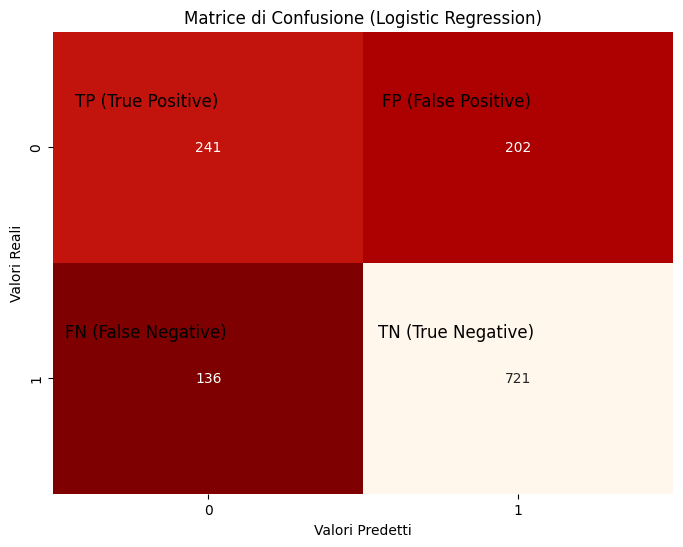

In [88]:
# Dataviz: grafico della matrice di confusione

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="OrRd_r", cbar=False)

# Precisazione dei label per la matrice di confusione
plt.text(0.3, 0.3, 'TP (True Positive)', fontsize=12, color='black', horizontalalignment='center', verticalalignment='center')
plt.text(1.3, 0.3, 'FP (False Positive)', fontsize=12, color='black', horizontalalignment='center', verticalalignment='center')
plt.text(0.3, 1.3, 'FN (False Negative)', fontsize=12, color='black', horizontalalignment='center', verticalalignment='center')
plt.text(1.3, 1.3, 'TN (True Negative)', fontsize=12, color='black', horizontalalignment='center', verticalalignment='center')

plt.xlabel('Valori Predetti')
plt.ylabel('Valori Reali')
plt.title('Matrice di Confusione (Logistic Regression)')
plt.show()

<h1> Ridefinizione dei titoli delle colonne </h1>

In [89]:
# Una volta addestrato il modello, ho rinominato i titoli delle colonne del df, sostituendo gli spazi con '_'
# Questa modifica mi consente di utilizzare i nomi delle colonne come features nel BaseModel quando costruirò l'API per esporre il modello
df_wine.columns = df_wine.columns.str.replace(' ', '_')

In [90]:
# Mostra il df con le modifiche apportate ai nomi delle colonne
display(df_wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1,1


In [91]:


# Supponiamo che df_wine sia il tuo DataFrame
# Specifica il percorso completo del file CSV, incluso il nome del file
percorso_file_csv = '/Users/albertopuggioni/PycharmProjects/ai_ml_esame_finale/CSV/wine_data.csv'

# Utilizza il metodo to_csv() per esportare il DataFrame nella cartella specificata
df_wine.to_csv(percorso_file_csv, index=False)  # L'argomento index=False impedisce di scrivere l'indice nel CSV

<h1> Salvataggio del modello </h1>

<h1> Ho provato ad utilizzare la libreria di sklearnpmml2 per esportare e salvare il modello, ma mi dava un errore di compatibilità con la versione del converter. Ho inoltre provato a fare il downgrade di sklearn alla versione 1.2.2, ma senza successo.
Ho quindi scelto di utilizzare la libreria joblib per salvare ed esportare il modello </h1>

In [92]:
# Importo la libreria per salvare il modello
#from sklearn2pmml import sklearn2pmml

# Nomino il modello e lo salvo nella directory 'modello' del progetto
#pmml_modello_wine_quality = '/Users/albertopuggioni/PycharmProjects/ai_ml_esame2/modello/logistic_regression_model.pmml'

# conversione del modello in pmml 
#sklearn2pmml(logistic_model, pmml_modello_wine_quality)

# messaggio che conferma l'versione e salvataggio
#print(f"Successo: Modello convertito e salvato come '{pmml_modello_wine_quality}'")

In [93]:
# importazione della libreria joblib per salvare il modello addestrato
import joblib

# valorizzo il modello e lo inserisco nella cartella appropriata del progetto
model_wine_quality = "/Users/albertopuggioni/PycharmProjects/ai_ml_esame_finale/modello/modello_logistic_regression.pkl"

# salvataggio del modello + messaggio di conferma dell'avvenuto salvataggio
joblib.dump(logistic_model, model_wine_quality)
print(f"Modello salvato con successo in: {model_wine_quality}")

Modello salvato con successo in: /Users/albertopuggioni/PycharmProjects/ai_ml_esame_finale/modello/modello_logistic_regression.pkl
